The file Hotel Reservations.csv contains the different attributes of customers' reservation details.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

resdf=pd.read_csv("./Hotel Reservations.csv") 

print(resdf.shape)
resdf.head()

(36275, 19)


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Numerical Variables: no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_request 

Nominal Variables: Booking_ID, type_of_meal_plan, required_car_parking_space, room_type_reserved, market_segment_type, repeated_guest, booking_status

Ordinal Variables: arrival_year, arrival_month, arrival_date

Mean, median, min, max, and standard deviation for each of the
quantitative variables.

In [11]:
numeric_resdf= resdf.loc[:,["no_of_adults", "no_of_children", "no_of_weekend_nights", "no_of_week_nights", "lead_time", "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled", "avg_price_per_room", "no_of_special_requests"]]

stats_df=pd.DataFrame({'Mean': numeric_resdf.mean(),
              'Median': numeric_resdf.median(),
              'Min': numeric_resdf.min(),
              'Max': numeric_resdf.max(),
              'Std': numeric_resdf.std()}).transpose()

stats_df


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
Mean,1.844962,0.105279,0.810724,2.204300,85.232557,0.023349,0.153411,103.423539,0.619655
Median,2.000000,0.000000,1.000000,2.000000,57.000000,0.000000,0.000000,99.450000,0.000000
Min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Max,4.000000,10.000000,7.000000,17.000000,443.000000,13.000000,58.000000,540.000000,5.000000
Std,0.518715,0.402648,0.870644,1.410905,85.930817,0.368331,1.754171,35.089424,0.786236


Histogram Plot for each of the quantitative variables. Based on the histograms
and summary statistics, answer the following questions:

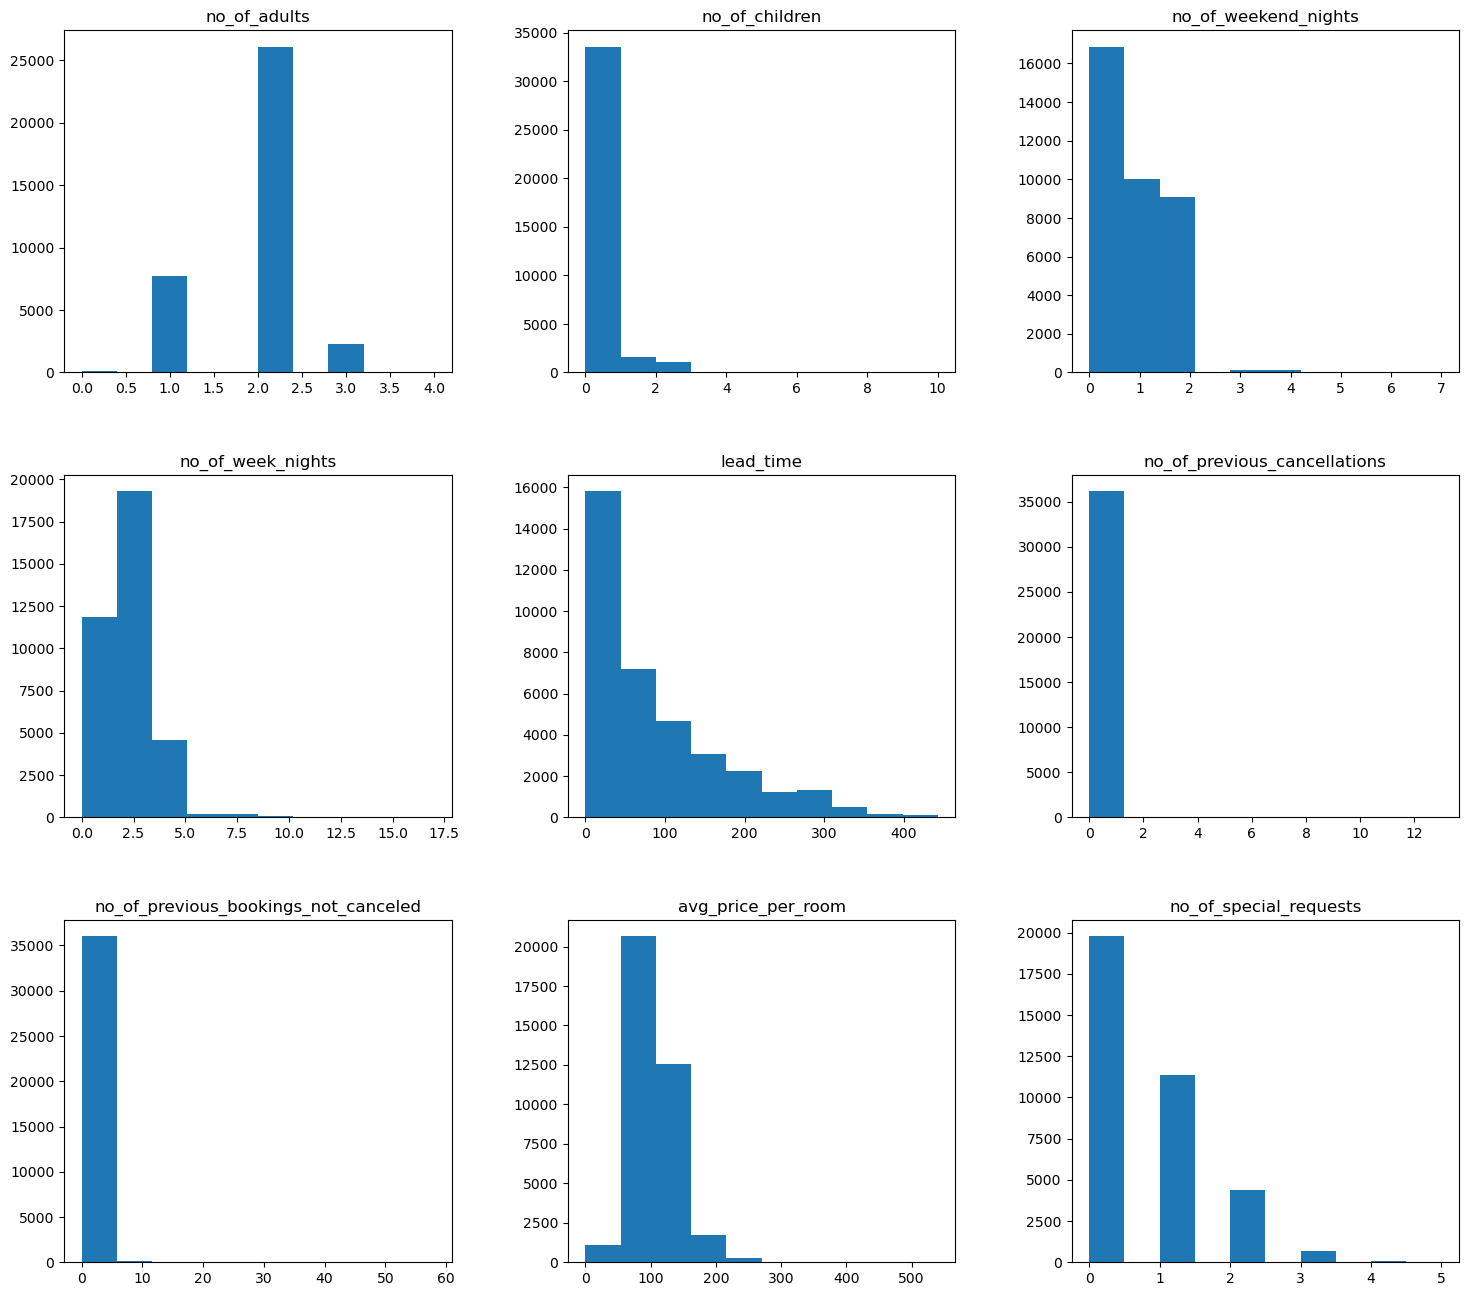

In [12]:
numeric_resdf.hist(bins = 10, grid = False, figsize = (18, 16))
plt.show()


In [13]:
numeric_resdf.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,85.232557,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,85.930817,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,17.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,57.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,126.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,443.000000,13.000000,58.000000,540.000000,5.000000


Compute the correlation table for the quantitative variable (function cor()). In addition, generate a matrix plot for these variables (function plot(data)).


In [14]:
numeric_resdf.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.097287,-0.047426,-0.119166,0.296886,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,-0.047091,-0.016390,-0.021189,0.337728,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,0.046595,-0.020690,-0.026312,-0.004525,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,0.149650,-0.030080,-0.049344,0.022753,0.045994
lead_time,0.097287,-0.047091,0.046595,0.149650,1.000000,-0.045723,-0.078137,-0.062596,-0.101645
no_of_previous_cancellations,-0.047426,-0.016390,-0.020690,-0.030080,-0.045723,1.000000,0.468147,-0.063340,-0.003317
no_of_previous_bookings_not_canceled,-0.119166,-0.021189,-0.026312,-0.049344,-0.078137,0.468147,1.000000,-0.113684,0.027377
avg_price_per_room,0.296886,0.337728,-0.004525,0.022753,-0.062596,-0.063340,-0.113684,1.000000,0.184381
no_of_special_requests,0.189401,0.124486,0.060593,0.045994,-0.101645,-0.003317,0.027377,0.184381,1.000000


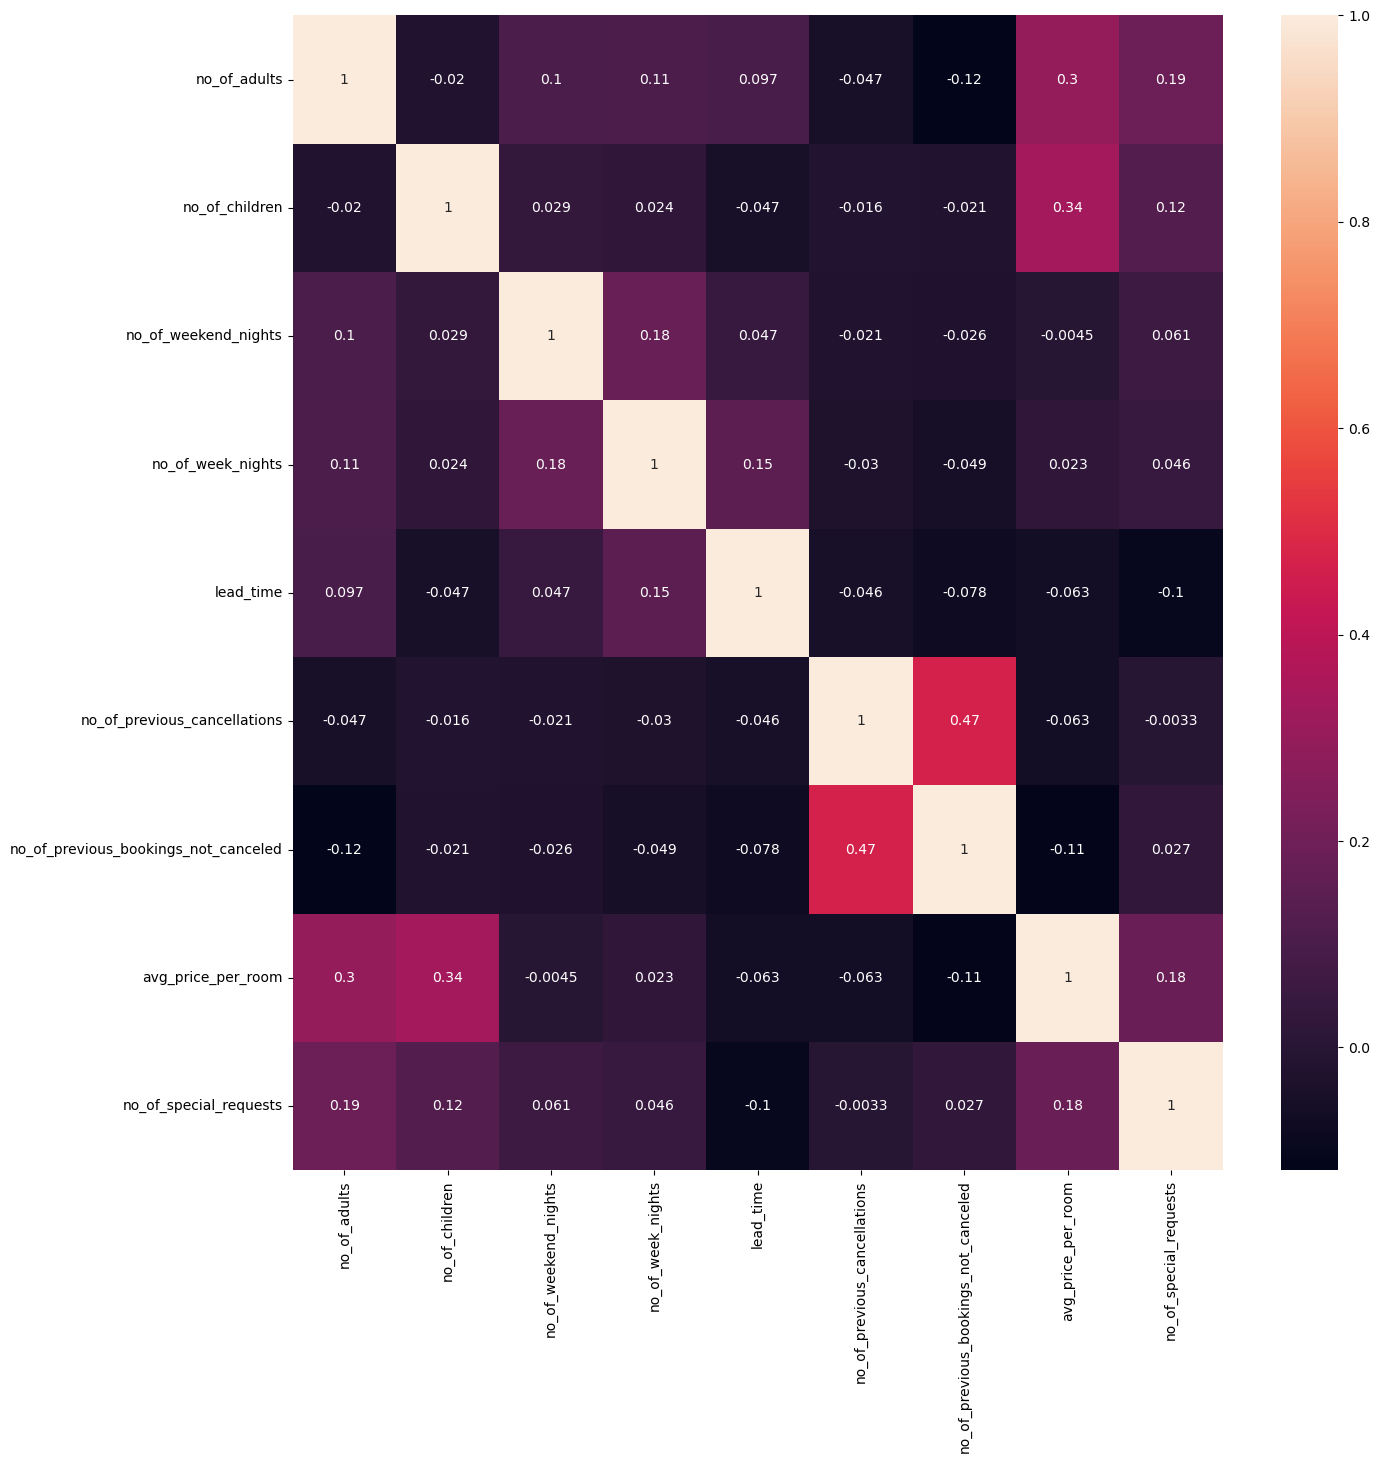

In [15]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(numeric_resdf.corr(), annot=True, ax=ax)
plt.show()

Principal components analysis for the variables (from no_of_adults to no_of_special_requests) to determine new variables (principal components) that cover most information of original data.

In [16]:
X = resdf.iloc[:, [1,2,3,4,6,8,9,10,11,13,14,16,17]].to_numpy()

pca = PCA()
pca.fit_transform(X)

var_ratio = pca.explained_variance_ratio_
cuml_var_ratio = np.cumsum(var_ratio)

thresh=0.9
n_comps = np.argmax(cuml_var_ratio >= thresh) + 1

eigenval = pca.explained_variance_
eigenvect = pca.components_

index_of_desc= np.argsort(eigenval)
index_of_desc=index_of_desc[::-1]
eigenval_desc=eigenval[index_of_desc]
eigenvect_desc = eigenvect[:, index_of_desc]
print("Eigen Values:", eigenval_desc)
print("\n\nEigen Vectors:", eigenvect_desc)

Eigen Values: [7.39012657e+03 1.22562239e+03 7.63875557e+01 9.21889822e+00
 1.98654730e+00 7.32154899e-01 5.79301172e-01 2.37398938e-01
 1.38924938e-01 1.35010215e-01 1.15406161e-01 3.00801676e-02
 1.84062536e-02]


Eigen Vectors: [[ 5.64180259e-04 -2.40143808e-04  4.72182547e-04  2.45002895e-03
  -1.35368838e-04  9.99514876e-01  6.29672857e-04  4.86315632e-03
   6.41229959e-04 -2.45785124e-04 -1.92381050e-04 -3.06257344e-02
  -9.49754143e-04]
 [ 4.51688732e-03  3.85152823e-03 -2.43943410e-05  1.37451284e-03
   2.79281028e-04  3.05906984e-02  2.07856165e-03  5.72152702e-03
   4.89892380e-03 -8.37326220e-04 -7.04230881e-04  9.99474313e-01
   3.98105444e-03]
 [ 1.18185957e-03  8.93010151e-04  2.72624832e-03 -1.81302355e-03
  -1.27766020e-05 -6.97541315e-04  7.29874972e-04 -1.79379389e-02
   9.99819630e-01 -2.11038219e-04 -4.54604522e-04 -4.79017073e-03
   1.34473888e-03]
 [ 1.48470399e-03  2.22117100e-03  4.38191325e-03 -8.59161288e-03
   5.61580486e-04  5.00020689e-03  4.79673029e-02 -9

In [17]:
pcs = np.dot(X, eigenvect_desc)
pcs_thresh = pcs[:, :n_comps]
print(pcs_thresh)

[[270.05111534  62.37639847]
 [248.87062286  57.12192751]
 [255.75220983  47.4984997 ]
 ...
 [266.17569416  60.31903281]
 [260.31749439  51.33471539]
 [266.70964688  52.95561588]]


Loading matrix and data matrix of new variables.

In [18]:
loading_matrix = pca.components_

load=pd.DataFrame({"PC1":loading_matrix[0], "PC2":loading_matrix[1]})
load

,PC1,PC2
0,0.000564,0.004517
1,-0.000240,0.003852
2,0.000472,-0.000024
3,0.002450,0.001375
4,-0.000135,0.000279
5,0.999515,0.030591
6,0.000630,0.002079
7,0.004863,0.005722
8,0.000641,0.004899
9,-0.000246,-0.000837


In [19]:
data_matrix = pca.transform(X)
data_matrix_df=pd.DataFrame(data_matrix)
column_names = ["PC" + str(i + 1) for i in range(data_matrix_df.shape[1])]
data_matrix_df.columns = column_names
data_matrix_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,139.880472,-34.214351,-13.553938,-1.869322,-0.514423,0.157588,-0.412829,-0.289956,-0.175231,0.292049,-0.653884,0.009174,-0.004817
1,-80.279737,0.777102,-9.616502,-3.785636,1.165468,1.105691,-0.134190,-0.110819,0.082359,-0.175610,0.350350,-0.039626,0.027741
2,-82.882363,-45.955686,12.768466,4.566130,-0.698674,1.110960,-0.767472,0.577918,-0.054446,-0.181443,0.058532,-0.040163,0.073650
3,125.802261,0.431247,4.371921,2.976118,-0.644856,-0.859603,-0.136586,-0.209109,-0.003397,-0.003761,-0.005981,-0.011807,-0.012883
4,-36.962834,-10.103356,-4.463933,3.302040,-1.040951,0.280907,-0.504184,-0.312395,-0.033651,-0.007466,0.101573,-0.033291,0.017619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,-2.198990,64.289007,-12.914983,-0.015199,3.877806,0.593656,-0.118895,-0.764794,0.154786,-0.125588,-0.002067,-0.004780,-0.087062
36271,143.094592,-8.070731,1.317868,-1.994775,0.534152,0.442183,1.394317,0.103068,0.054915,-0.136394,0.092832,-0.033692,-0.002854
36272,62.888520,-3.173346,-14.607981,0.906687,3.852398,0.869745,1.101561,0.180643,0.060605,-0.191359,-0.030500,-0.020819,-0.020480
36273,-21.959271,-9.592733,5.517448,3.176492,0.723887,-1.060396,-0.231120,-0.311031,-0.020986,-0.008041,0.107814,-0.025129,0.010588
